## We are using the Implicit Scheme to solve the following problem
   $$
   u_{t} = u_{xx}\\ 
   0 < x < 1 \\
   \textbf{Conditions :} \\
   u(x,0) = sin \Pi x\\
   u(0,t) = u(1,t) = 0
   $$ 

In [86]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
from matplotlib import animation

In [87]:
def forward_march(u, r):
    if r <= 1e-10:
        return u
    N = len(u)
    u_ = np.zeros(N, np.float64)
    for i in range(1, N-1):
        u_[i] = r*u[i-1] + (1-2*r)*u[i] + r*u[i+1]
    return u_

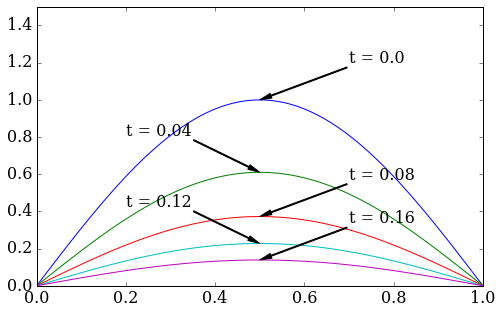

In [113]:
dx = 0.01
dT = 0.4*dx**2
# Range of X and T
rX = 1
rT = 1
m = int(rX/dx)
n = int()
X = np.linspace(0, rX, m+1)
Y = np.linspace(0, rT, n)
u0 = np.sin(np.pi*X)
fig = pyplot.figure(figsize=(8,5))
# ax = pyplot.axes()
pyplot.axis([0, 1, 0, 1.5])
line = pyplot.plot([], [], color='#003366', ls='--', lw=3)[0]
sign = 0
for i in range(5000):
    u_ = forward_march(u0, 0.5)
    if i%1000 == 0:
        sign = 1 if sign==0 else 0
        pyplot.plot(X, u_)
        
        pyplot.annotate('t = {:.2}'.format(i*dT), xy=(0.5, u_[len(u_)/2]), xytext=(0.2 + sign*0.5, u_[len(u_)/2]+0.2), 
                        arrowprops=dict(width = 1, headwidth = 5, facecolor='black', shrink=0.0005),)
    u0 = u_
pyplot.show()